<a href="https://colab.research.google.com/github/NEPatriots-Coder/CashRegister/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
csv_file_path = "/content/drive/MyDrive/DataFiles/ecommerce_customers.csv"

In [13]:
customers = pd.read_csv(csv_file_path,encoding="ISO-8859-1")

In [14]:
customers.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.49726772511229,12.655651149166752,39.57766801952616,4.082620632952961,587.9510539684005
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272026360156,11.109460728682564,37.268958868297744,2.66403418213262,392.2049334443264
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000914755642675,11.330278057777512,37.11059744212085,4.104543202376424,487.54750486747207
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.30555662975554,13.717513665142508,36.72128267790313,3.1201787827480914,581.8523440352178
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.33067252364639,12.795188551078114,37.53665330059473,4.446308318351435,599.4060920457634


In [15]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Email                 1001 non-null   object
 1   Address               1001 non-null   object
 2   Avatar                1001 non-null   object
 3   Avg. Session Length   1001 non-null   object
 4   Time on App           1001 non-null   object
 5   Time on Website       1001 non-null   object
 6   Length of Membership  1001 non-null   object
 7   Yearly Amount Spent   1001 non-null   object
dtypes: object(8)
memory usage: 62.7+ KB


In [16]:
customers.describe()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,1001,1001,1001,1001,1001,1001,1001,1001
unique,501,501,139,501,501,501,501,501
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Cyan,34.49726772511229,12.655651149166752,39.57766801952616,4.082620632952961,587.9510539684005
freq,2,2,14,2,2,2,2,2


In [18]:
customers.loc[500, "Yearly Amount Spent"]= np.nan
customers.loc[500, "Avg. Session Length"]= np.nan
customers.loc[500, "Time on App"]= np.nan
customers.loc[500, "Time on Website"]= np.nan
customers.loc[500, "Length of Membership"]= np.nan

In [19]:
customers["Time on Website"] = pd.to_numeric(customers["Time on Website"], errors='coerce')
customers["Yearly Amount Spent"] = pd.to_numeric(customers["Yearly Amount Spent"])
customers["Length of Membership"] = pd.to_numeric(customers["Length of Membership"])
customers["Avg. Session Length"] = pd.to_numeric(customers["Avg. Session Length"])
customers["Time on App"] = pd.to_numeric(customers["Time on App"])

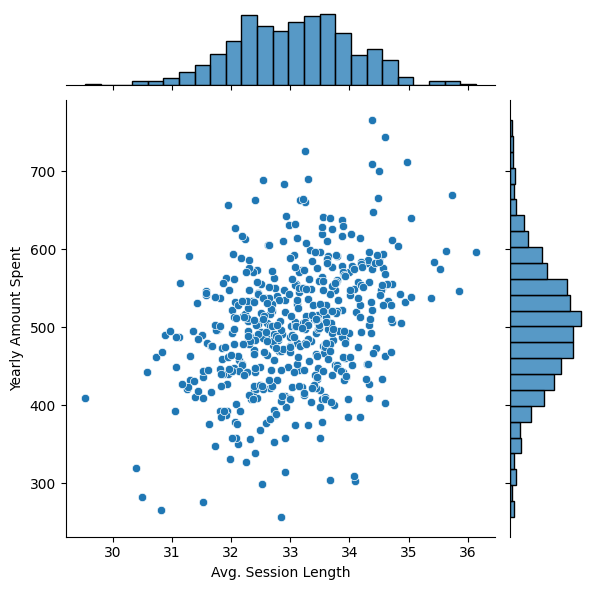

In [20]:
sns.jointplot(x="Avg. Session Length", y="Yearly Amount Spent", data=customers)


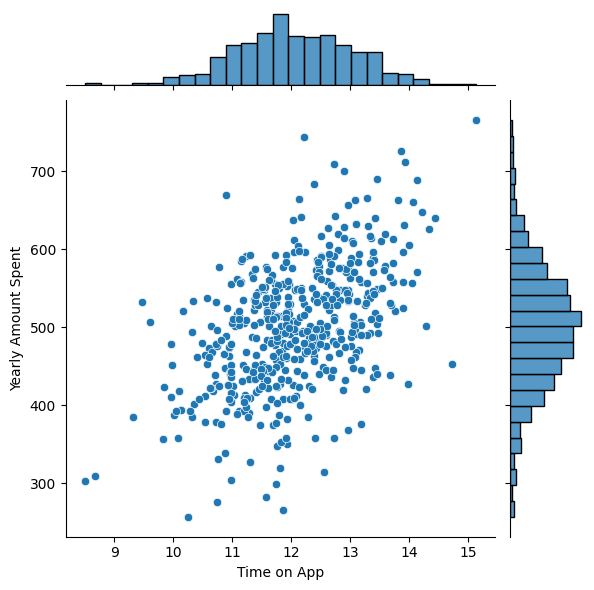

In [21]:
sns.jointplot(x="Time on App", y="Yearly Amount Spent", data=customers)

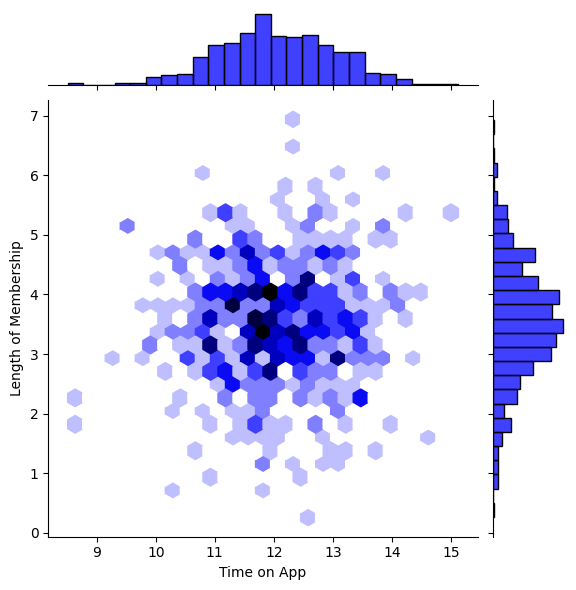

In [26]:
sns.jointplot(x='Time on App', y='Length of Membership', data=customers, kind="hex", color="blue")

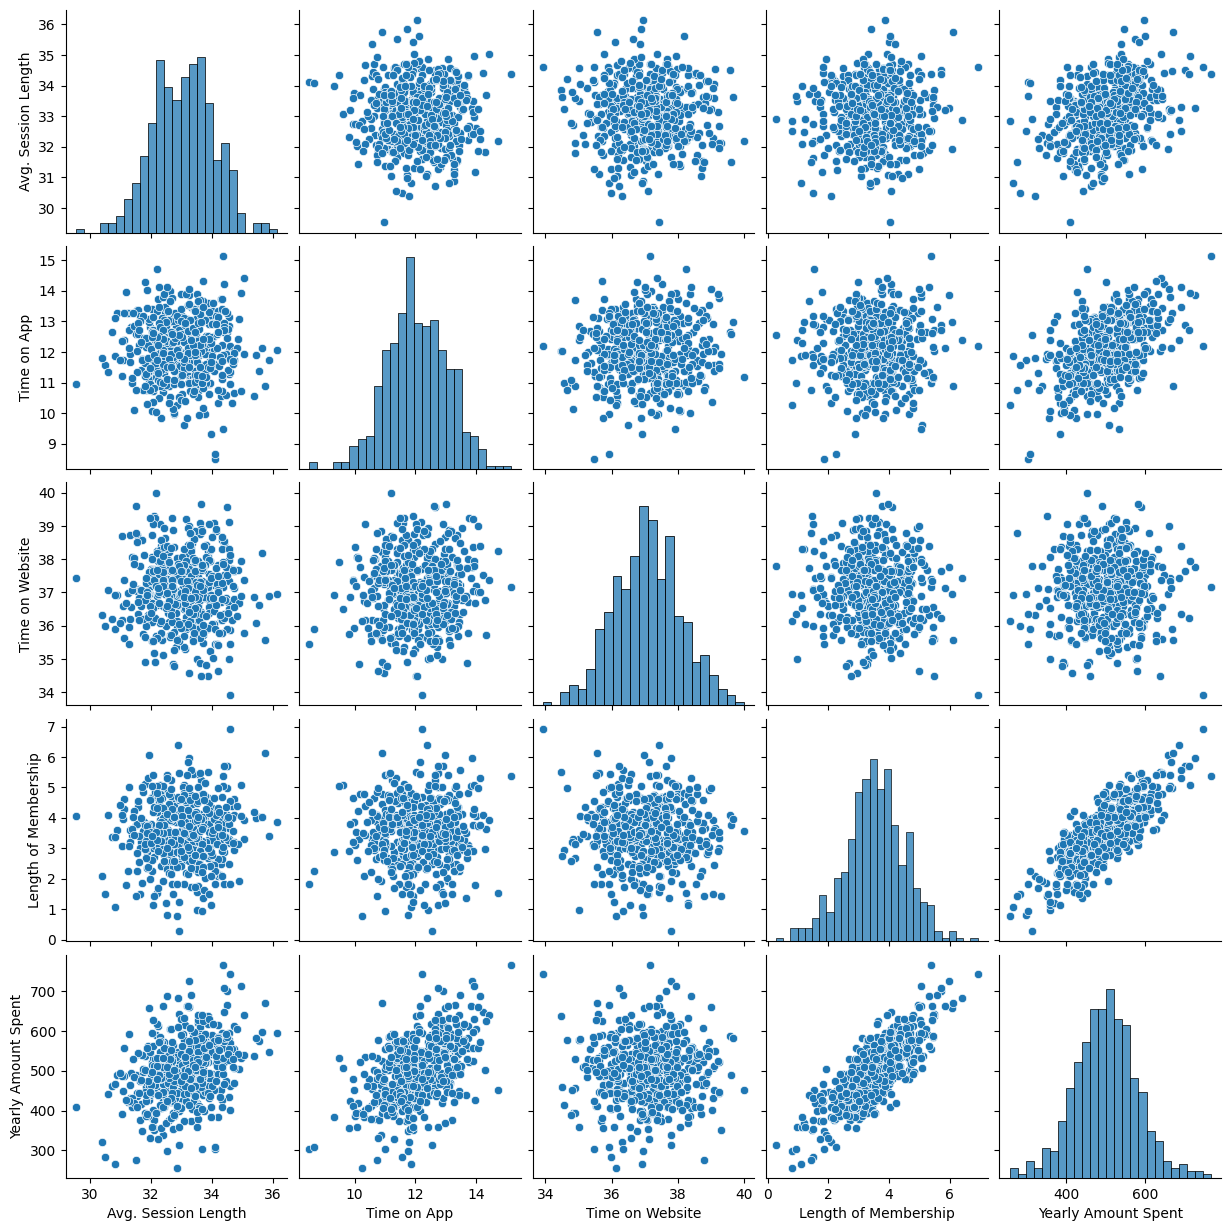

In [27]:
sns.pairplot(customers)

In [32]:
customers_numeric = customers.select_dtypes(include=np.number)
customers_numeric.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


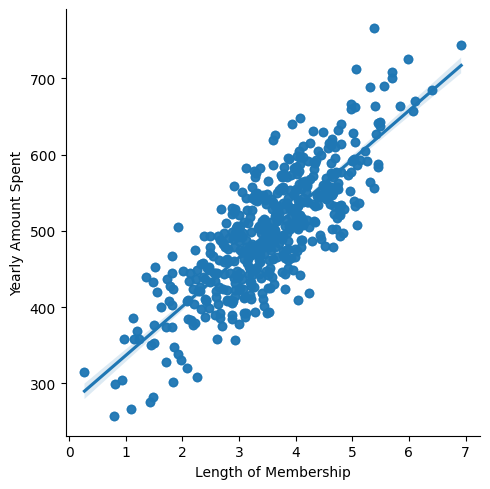

In [33]:
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=customers)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lm = LinearRegression()

In [39]:
lm.fit(X_train, y_train)

LinearRegression()

In [57]:
print(lm.intercept_)
print(lm.coef_)



-1060.620369375015
[26.10945863 38.54525407  0.43483842 61.25563203]


In [47]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

predictions = lm.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [49]:
print(predictions.shape)

(301,)


Text(0.5, 1.0, 'Real Test Values vs Predicted Values')

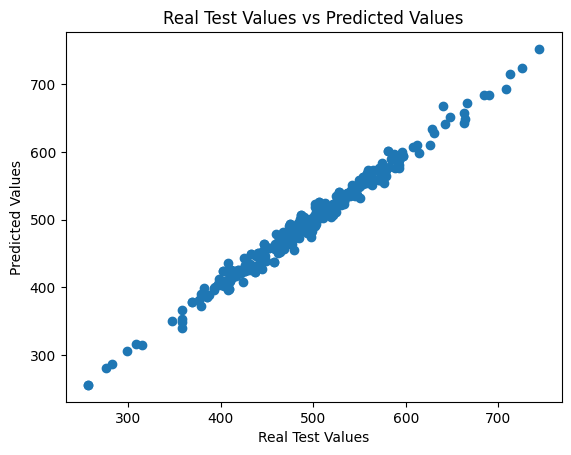

In [50]:
plt.scatter(y_test, predictions)
plt.xlabel("Real Test Values")
plt.ylabel("Predicted Values")
plt.title("Real Test Values vs Predicted Values")

In [58]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

# New Section